In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
words = open('data/names.txt','r').read().splitlines()

In [ ]:
len(words)

32033

In [ ]:
chars = sorted(list(set("".join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [ ]:
block_size = 3
X, Y = [], []
for w in words:
    context = [0]*block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [ ]:
X.shape, Y.shape, X.dtype, Y.dtype

(torch.Size([228146, 3]), torch.Size([228146]), torch.int64, torch.int64)

In [ ]:
C = torch.randn(27, 2)
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [ ]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [ ]:
h = torch.tanh((emb.view(-1, 6) @ W1) + b1)

In [ ]:
h.shape

torch.Size([228146, 100])

In [ ]:
W2 = torch.randn(100, 27)
b2 = torch.randn(27)

In [ ]:
logits = h @ W2 + b2
logits.shape

torch.Size([228146, 27])

In [ ]:
counts = logits.exp()

In [ ]:
probs = counts/counts.sum(1, keepdims=True)

In [ ]:
probs.shape

torch.Size([228146, 27])

In [ ]:
loss = -probs[torch.arange(probs.size(0)), Y].log().mean()
loss.item()

15.73750114440918

In [ ]:
def build_dataset(words):
    block_size = 3
    X, Y = [], []
    for w in words:
        context = [0]*block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
    
    X = torch.tensor(X)
    Y = torch.tensor(Y)

    return X, Y


import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xe, Ye = build_dataset(words[n2:])

In [ ]:
Xtr.shape, Ytr.shape, Xdev.shape, Ydev.shape, Xe.shape, Ye.shape

(torch.Size([182580, 3]),
 torch.Size([182580]),
 torch.Size([22767, 3]),
 torch.Size([22767]),
 torch.Size([22799, 3]),
 torch.Size([22799]))

In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [ ]:
sum(p.nelement() for p in parameters)

11897

In [ ]:
for p in parameters:
    p.requires_grad = True

In [ ]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

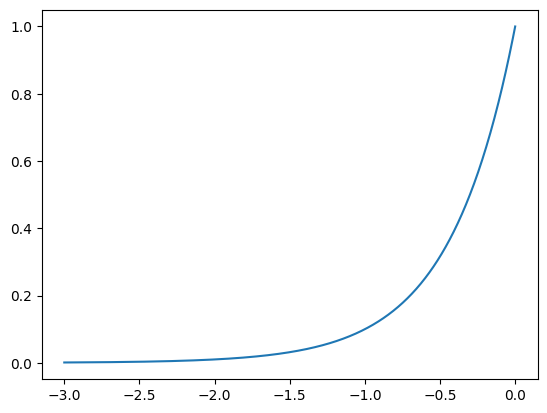

In [ ]:
plt.plot(lre, lrs);

In [ ]:
lri = []
lossi = []
stepi = []
for i in range(1000):
    # mini batch
    ix = torch.randint(0, Xtr.size(0), (32, ))

    # forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh((emb.view(-1, 30) @ W1) + b1)
    logits = (h@W2)+b2
    loss = F.cross_entropy(logits, Ytr[ix])

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad

    stepi.append(i)
    lri.append(lre[i])
    lossi.append(loss.item())

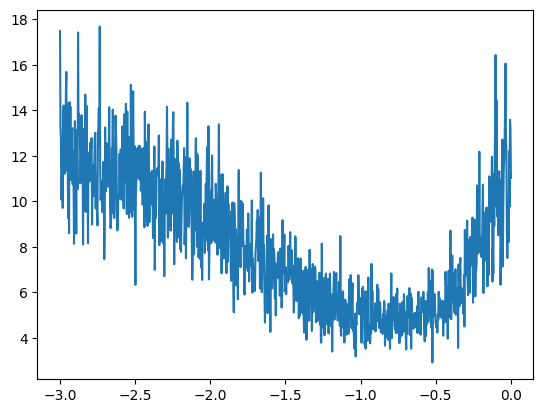

In [ ]:
plt.plot(lri, lossi);

In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

sum(p.nelement() for p in parameters)

11897

In [ ]:
lri = []
lossi = []
stepi = []
for i in range(200000):
    # mini batch
    ix = torch.randint(0, Xtr.size(0), (32, ))

    # forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh((emb.view(-1, 30) @ W1) + b1)
    logits = (h@W2)+b2
    loss = F.cross_entropy(logits, Ytr[ix])

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad

    stepi.append(i)
    lossi.append(loss.log10().item())

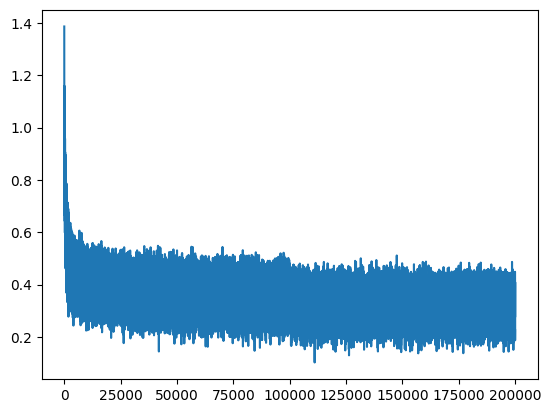

In [ ]:
plt.plot(stepi, lossi);

In [ ]:
emb = C[Xtr]
h = torch.tanh((emb.view(-1, 30) @ W1) + b1)
logits = (h@W2)+b2
loss = F.cross_entropy(logits, Ytr)
loss.item()

2.13034987449646

In [ ]:
emb = C[Xdev]
h = torch.tanh((emb.view(-1, 30) @ W1) + b1)
logits = (h@W2)+b2
loss = F.cross_entropy(logits, Ydev)
loss.item()

2.171335458755493

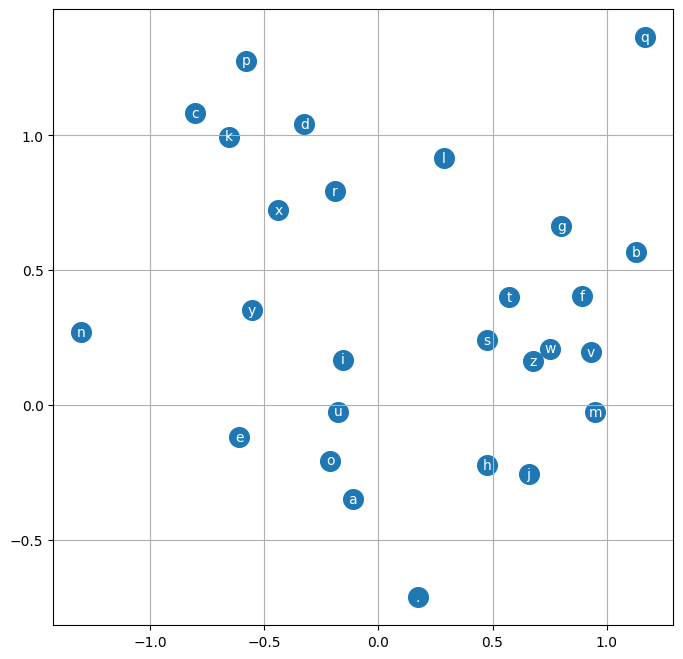

In [ ]:
# plt.figure(figsize=(8, 8));
# plt.scatter(C[:, 0].data, C[:, 1].data, s=200);
# for i in range(C.shape[0]):
#     plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], color='white', ha='center', va='center')
# plt.grid('minor')

In [ ]:
for _ in range(20):
    out = []
    context = [0] * block_size 
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh((emb.view(1, -1) @ W1) + b1)
        logits = (h @ W2) + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    print(''.join(itos[i] for i in out))

buck.
traylennosy.
isa.
lea.
arcotete.
aenyy.
ariyanlo.
ulzaniem.
mattba.
lyn.
jonlynlandoni.
perwenna.
sazalaritan.
mylyn.
reccallalaan.
zerachemirton.
col.
liby.
romarie.
ango.
